In [2]:
import glob
import numpy as np
import pandas as pd
from pymatgen.core.structure import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.structure_analyzer import VoronoiConnectivity

files = glob.glob("./cif-for-eda/*.cif")

node_num = []
space_group = []
crystal_system = []

for file in files:
    crystal = Structure.from_file(file)
    # node number 
    node_num.append(len(crystal))
    # space group number 
    finder = SpacegroupAnalyzer(crystal)
    space_group.append(finder.get_space_group_number())
    # get_crystal_system
    crystal_system.append(finder.get_crystal_system())
    
data_dict = {
    'File name': files, 
    'node num': node_num, 
    'space group': space_group, 
    'crystal system': crystal_system
}

df = pd.DataFrame(data=data_dict)
df.head()

/usr/local/lib/python3.6/site-packages/pymatgen/io/cif.py:1101: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


,File name,node num,space group,crystal system
0,./cif-for-eda/1006888.cif,4,166,trigonal
1,./cif-for-eda/1008680.cif,3,216,cubic
2,./cif-for-eda/1008858.cif,3,216,cubic
3,./cif-for-eda/1006322.cif,18,86,tetragonal
4,./cif-for-eda/1003314.cif,7,2,triclinic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a2b93cba8>,
      dtype=object)

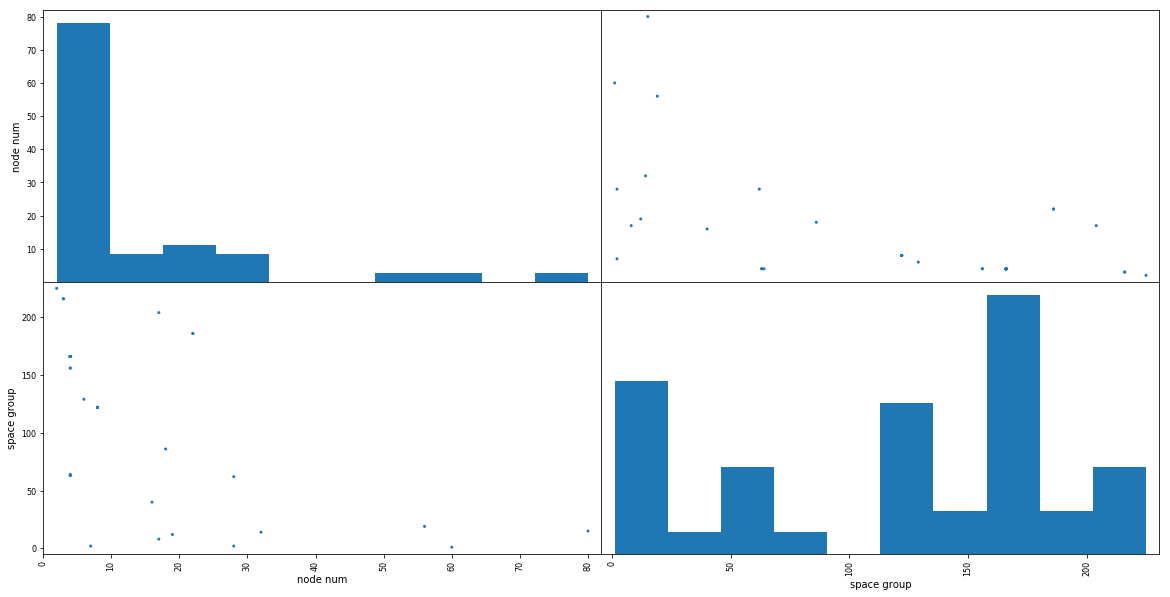

In [8]:
%matplotlib inline
import seaborn as sns

from pandas.plotting import scatter_matrix
x = scatter_matrix(df, alpha=1, figsize=(20, 10), diagonal='hist')
x

In [4]:
import pandas_profiling as pdp

profile = pdp.ProfileReport(df)
profile.to_file("eda.html")

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
